<a href="https://colab.research.google.com/github/zombig816/Numerical-methods/blob/main/num_methods%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100


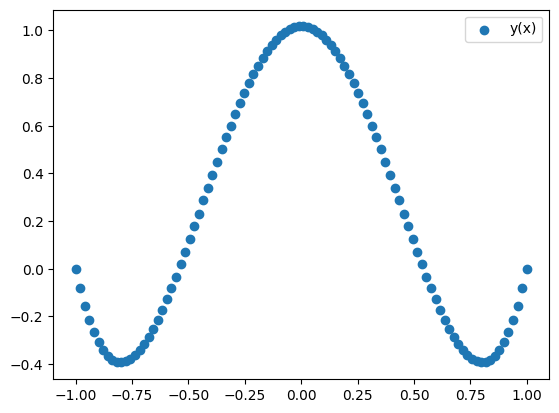

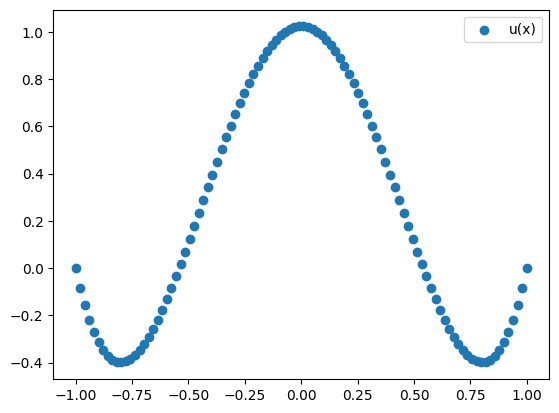

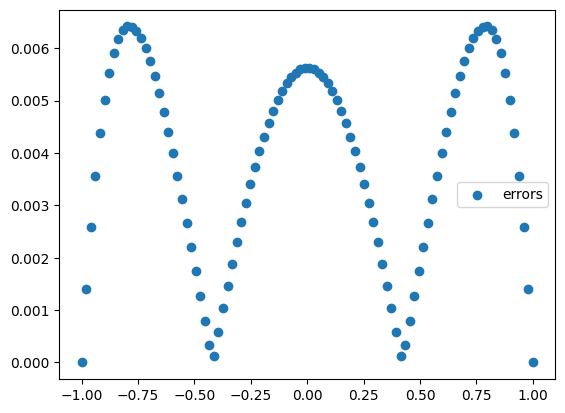

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, eps = 0.05):
  return ((1/eps) + np.pi**2) * np.cos(np.pi * x)

def q(x, eps = 0.05):
  return 1/eps

def u(x, eps = 0.05):
  return (np.cos(np.pi * x)
   + np.exp((x - 1.0)/(eps**0.5))
    + np.exp(-(x + 1.0)/(eps**0.5)))

def progonka(a, b, n):
  h = (b - a) / n
  ua = u(a)
  ub = u(b)
  x = np.linspace(a, b, n)

  Q = [q(i) for i in x]
  F = [f(i) for i in x]

  A = []
  B = []
  C = []

  A.append(0.0)
  B.append(1.0)
  C.append(0.0)
  for i in range(1, n - 1):
    A.append(-1 / h ** 2)
    C.append(-1 / h ** 2)
    B.append((2 / h ** 2) + Q[i])

  A.append(0.0)
  B.append(1.0)
  C.append(0.0)

  F[0] = ua
  F[-1] = ub

  alpha = np.zeros(N)
  betta = np.zeros(N)

  alpha[1] = (-C[0] / B[0])
  betta[1] = (F[0] / B[0])

  for i in range(1, N-1):
    alpha[i+1] =  -(C[i]/(B[i] + alpha[i]*A[i]))
    betta[i+1] =  (F[i] - A[i]*betta[i]) / (B[i] + A[i]*alpha[i])

  y = np.zeros(N)

  y[N-1] = (F[-1] - A[-1]*betta[-1]) / (B[-1] + A[-1]*alpha[-1])
  y[N-1] = ub
  print(len(alpha))

  for i in range(N-2, -1, -1):
    y[i] = (alpha[i+1] * y[i+1] + betta[i+1])

  return x, y

a = -1
b = 1
eps = 0.05
N = 100
h = (b-a)/N
x, y = progonka(a, b, N)


ux = u(x)
fig, ax = plt.subplots()
ax.scatter(x, y, label='y(x)')
plt.legend()

fig2, ax2 = plt.subplots()
ax2.scatter(x, ux, label='u(x)')
plt.legend()


errors = np.abs(ux-y)
fig2, ax2 = plt.subplots()
ax2.scatter(x, errors, label='errors')
# print("Максимальная погрешность:\n", max(errors), "\nh^2:\n", (h**2))

plt.legend()
plt.show()